In [522]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
from matplotlib import font_manager as fm
from matplotlib import rc
font_name=fm.FontProperties(fname='C:\Windows\Fonts\HancomHoonminjeongeumH.ttf').get_name()
rc('font', family=font_name)

In [523]:
'''
Med_HisDF: medical history section
'''

'\nMed_HisDF: medical history section\n'

In [524]:
DF=pd.read_csv('../DATA/기후.csv',encoding='EUC-KR')
DF.columns
DF


,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간풍속 시각(hhmi),평균 풍속(m/s),최대 순간 풍속 풍향(deg)
0,330,대흘,2020-01-01,3.4,0.6,1.0,5.0,2312.0,0.0,6.6,304.0,3.1,334.7
1,330,대흘,2020-01-02,6.3,3.8,257.0,7.9,1520.0,0.0,5.3,2230.0,2.2,312.2
2,330,대흘,2020-01-03,7.0,3.9,2352.0,9.9,1211.0,0.0,8.9,1438.0,3.3,312.2
3,330,대흘,2020-01-04,6.2,3.2,447.0,9.6,1333.0,0.0,8.3,1510.0,3.1,320.6
4,330,대흘,2020-01-05,7.3,1.8,705.0,10.3,1343.0,0.0,4.8,1241.0,1.9,36.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,980,강정,2020-12-27,10.4,9.0,635.0,12.4,2039.0,44.5,10.5,1501.0,2.9,50.6
2539,980,강정,2020-12-28,11.3,6.5,724.0,16.4,1225.0,0.0,8.7,1920.0,2.2,64.7
2540,980,강정,2020-12-29,11.5,6.8,2256.0,15.8,1219.0,1.0,14.6,2307.0,2.5,5.6
2541,980,강정,2020-12-30,-0.1,-2.6,1852.0,9.6,17.0,6.5,18.1,842.0,6.2,292.5


In [525]:
DF=DF.loc[:,['지점명','일시','평균기온(°C)', '최저기온(°C)','최고기온(°C)']]
# 표선:13.316
# 강정: 12.308
# 서호:11.493
DF['지점명'].unique()

array(['대흘', '표선', '사제비', '새별오름', '서호', '제주가시리', '강정'], dtype=object)

    지점명    일시  평균기온(°C)  최저기온(°C)  최고기온(°C)
366  표선  0101       3.8       0.4       6.6
367  표선  0102       6.9       3.9       9.7
368  표선  0103       7.7       5.2      12.3
369  표선  0104       7.1       4.3      12.0
370  표선  0105       7.6       2.9      12.0
..   ..   ...       ...       ...       ...
727  표선  1227      10.0       4.7      12.4
728  표선  1228      10.3       6.7      14.4
729  표선  1229       8.6       2.1      14.1
730  표선  1230      -0.6      -2.8       2.8
731  표선  1231       1.0      -1.9       3.1

[366 rows x 5 columns]
[<Axes: > <Axes: > <Axes: > <Axes: >]


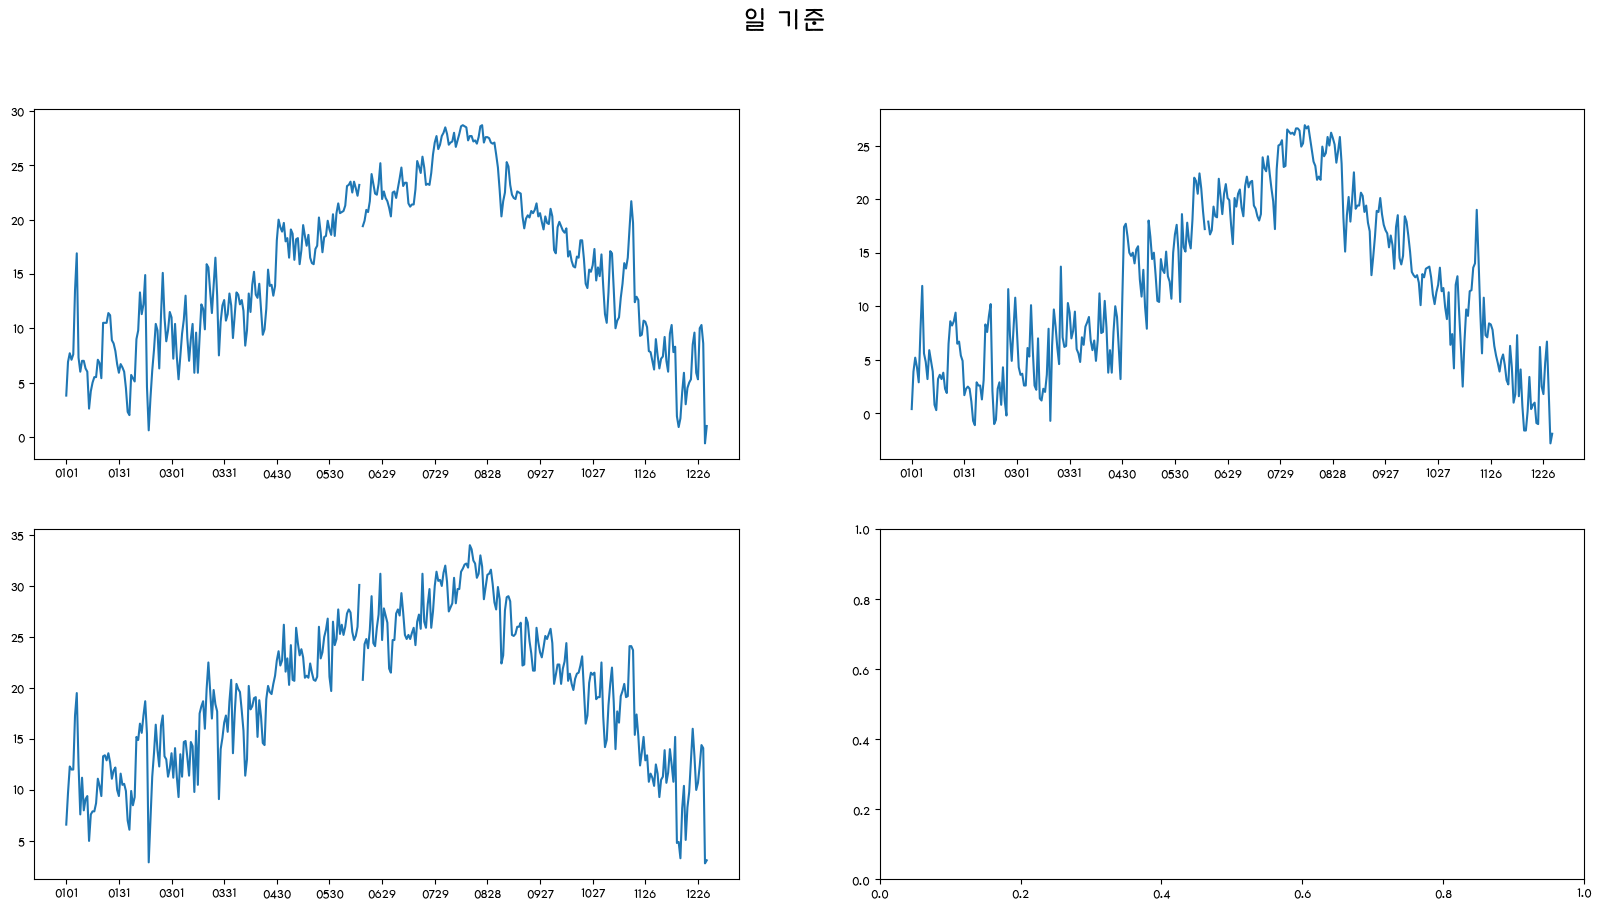

In [526]:
표선DF=DF.loc[DF['지점명']=='표선']
표선DF=표선DF.copy()
표선dateSR=표선DF['일시'].str.split('-').str[1:3]
표선dateSR=표선dateSR.str[0]+표선dateSR.str[1]
표선DF['일시']=표선dateSR
print(표선DF)
# 표 그리기기
fig,axes=plt.subplots(2,2,figsize=(20,10))
plt.suptitle('일 기준',size=20)
print(axes.flatten())
for x,y in zip(axes.flatten()[:-1],range(2,5)):
    x.plot(pd.Series(range(366)),표선DF.iloc[:,y],)
    x.set_xticks(pd.Series(range(0,표선DF.shape[0],30)),표선DF['일시'][::30])


ValueError: x and y must have same first dimension, but have shapes (366,) and (347,)

c:\Users\gy931\anaconda3\envs\PY39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Hancom Hoonminjeongeum_H.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

c:\Users\gy931\anaconda3\envs\PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Hancom Hoonminjeongeum_H.
  fig.canvas.print_figure(bytes_io, **kw)


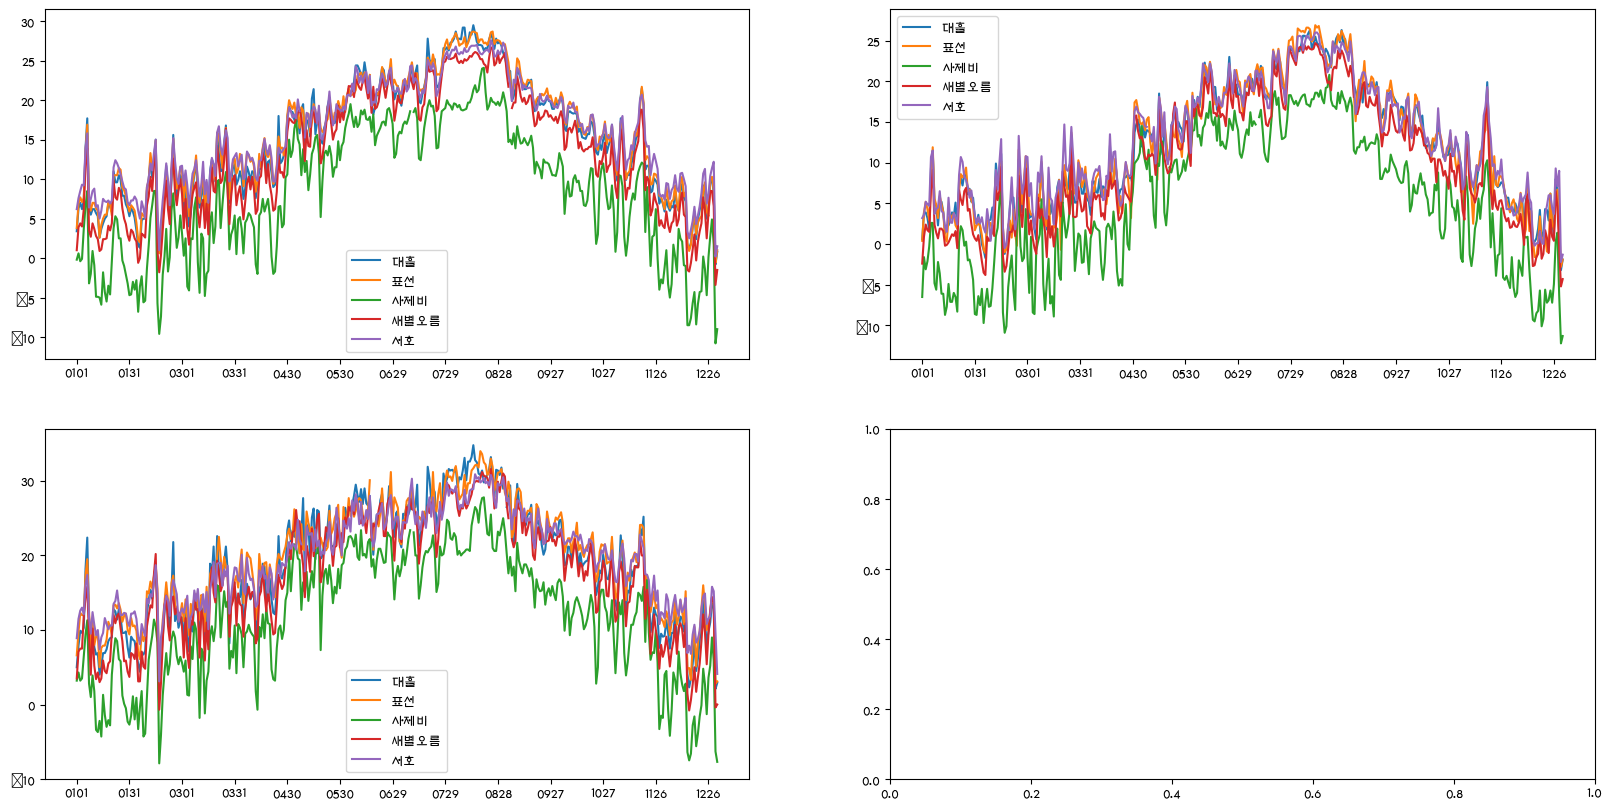

In [ ]:
plt.suptitle('일 기준',size=20)
fig,axes=plt.subplots(2,2,figsize=(20,10))
print(DF['지점명'].unique())
for x in DF['지점명'].unique():
    color=['red','green','blue']
    a=DF.loc[DF['지점명']==x]
    a=a.copy()
    b=a['일시'].str.split('-').str[1:3]
    b=b.str[0]+b.str[1]
    a['일시']=b
    for q,w in zip(axes.flatten()[:-1],range(2,5)):
        q.plot(pd.Series(range(366)),a.iloc[:,w],label=x)
        q.set_xticks(pd.Series(range(0,a.shape[0],30)),a['일시'][::30])
        q.legend()

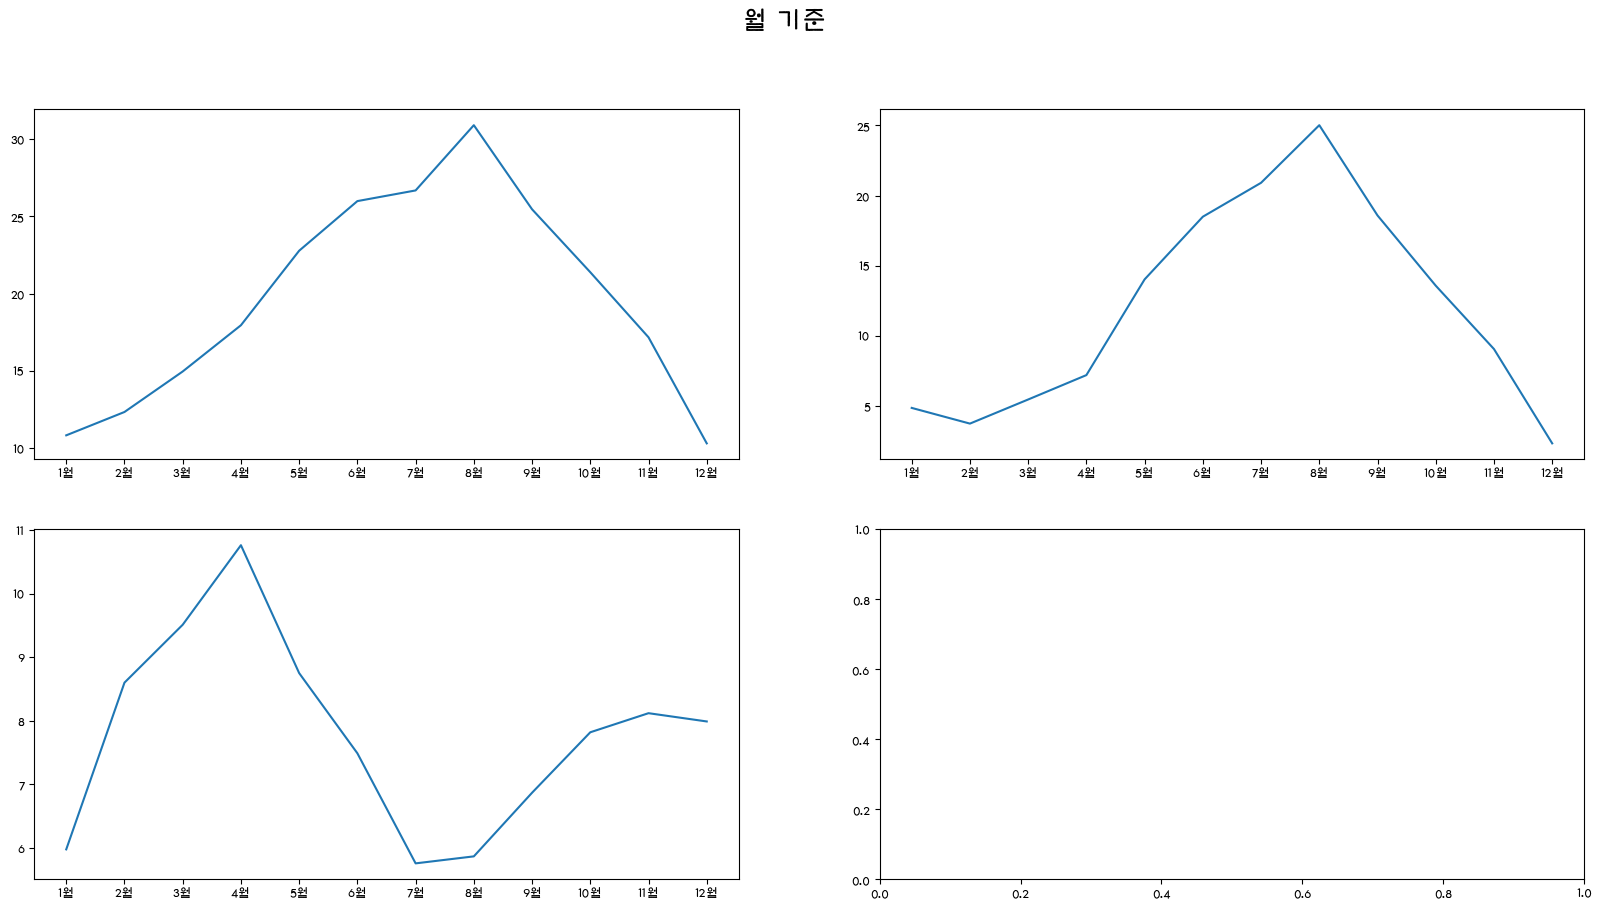

In [514]:
# 월 자료 만들기
# 월별 평균 최저, 최고기온, 일교차
list1=range(1,13)
fig,axes=plt.subplots(2,2,figsize=(20,10))
plt.suptitle('월 기준',size=20)
b=[]
c=[]
d=[]
for x in list1:
    a=표선DF[표선DF['일시'].str[:2].astype('int')==x]
    b.append(round(a['최고기온(°C)'].mean(),2))
    c.append(round(a['최저기온(°C)'].mean(),2))
    d.append(round(a['최고기온(°C)'].mean()-a['최저기온(°C)'].mean(),2))

for x,y in zip(axes.flatten()[:-1],[b,c,d]):
    x.plot(pd.Series(range(12)),y) 
    x.set_xticks(pd.Series(range(12)),['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'])

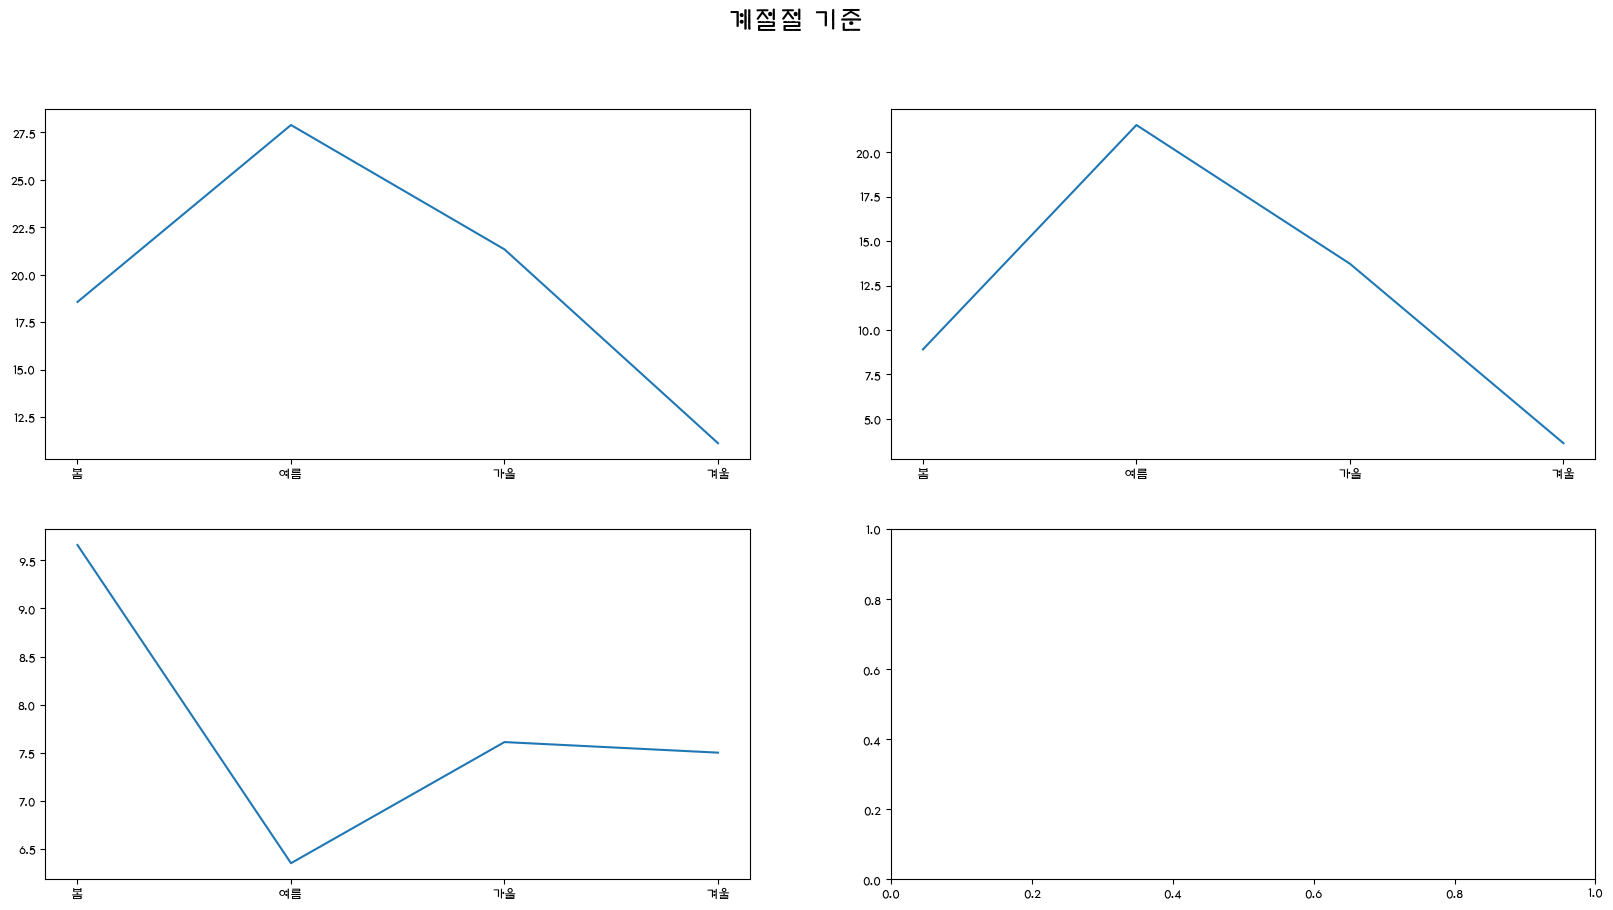

In [515]:
# 계절 자료 만들기
# 봄 
a=표선DF[(표선DF['일시'].str[:2].astype('int')==3) | (표선DF['일시'].str[:2].astype('int')==4) |(표선DF['일시'].str[:2].astype('int')==5) ]
b=표선DF[(표선DF['일시'].str[:2].astype('int')==6) | (표선DF['일시'].str[:2].astype('int')==7) |(표선DF['일시'].str[:2].astype('int')==8) ]
c=표선DF[(표선DF['일시'].str[:2].astype('int')==9) | (표선DF['일시'].str[:2].astype('int')==10) |(표선DF['일시'].str[:2].astype('int')==11) ]
d=표선DF[(표선DF['일시'].str[:2].astype('int')==12) | (표선DF['일시'].str[:2].astype('int')==1)|(표선DF['일시'].str[:2].astype('int')==2) ]
q=[]
w=[]
r=[]
fig,axes=plt.subplots(2,2,figsize=(20,10))
plt.suptitle('계절절 기준',size=20)
for x in [a,b,c,d]:
    q.append(round(x['최고기온(°C)'].mean(),2))
    w.append(round(x['최저기온(°C)'].mean(),2))
    r.append(round(x['최고기온(°C)'].mean()-x['최저기온(°C)'].mean(),2))
for x,y in zip(axes.flatten()[:-1],[q,w,r]):
    x.plot(pd.Series(range(4)),y) 
    x.set_xticks(pd.Series(range(4)),['봄','여름','가을','겨울'])


c:\Users\gy931\anaconda3\envs\PY39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Hancom Hoonminjeongeum_H.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

c:\Users\gy931\anaconda3\envs\PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Hancom Hoonminjeongeum_H.
  fig.canvas.print_figure(bytes_io, **kw)


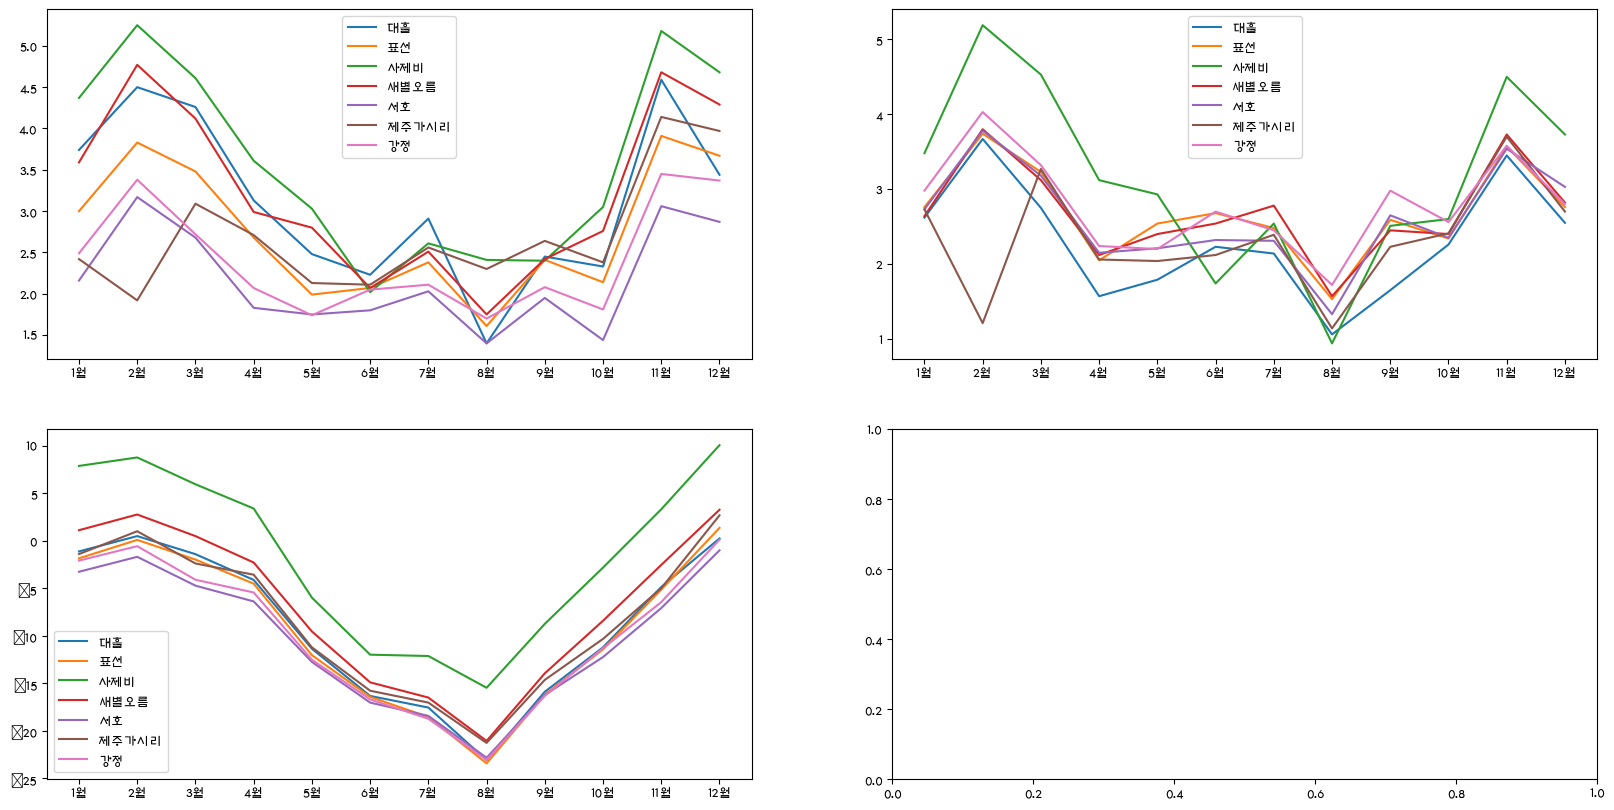

In [528]:
plt.suptitle('월 기준',size=20)
fig,axes=plt.subplots(2,2,figsize=(20,10))
for x in DF['지점명'].unique():
    a=DF.loc[DF['지점명']==x]
    a=a.copy()
    b=a['일시'].str.split('-').str[1:3]
    b=b.str[0]+b.str[1]
    a['일시']=b
    list1=range(1,13)
    q=[]
    w=[]
    r=[]
    for p in list1:
        m=a[a['일시'].str[:2].astype('int')==p]
        q.append(round(m['최고기온(°C)'].std(),2))
        w.append(round(m['최저기온(°C)'].std(),2))
        r.append(round(m['최고기온(°C)'].std()-m['최저기온(°C)'].mean(),2))
    for n,y in zip(axes.flatten()[:-1],[q,w,r]):
        n.plot(pd.Series(range(12)),y,label=x) 
        n.set_xticks(pd.Series(range(12)),['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'])
        n.legend()
# 표선:13.316
# 강정: 12.308
# 서호:11.493

In [517]:
# 일/월/계절 교차 확인
print(표선DF)
# 일교차
list1=range(1,13)
a=표선DF['최고기온(°C)']-표선DF['최저기온(°C)']
표선_supDF=pd.concat([표선DF.loc[:,:'일시'],a],axis=1)
표선_supDF.rename({0:'일교차'},axis=1,inplace=True)
# 월 별 조건 만들기
a=표선DF[표선_supDF['일시'].str[:2].astype('int')==1]

# plt.plot(pd.Series(range(366)),표선_supSR,'o')
# plt.xticks(pd.Series(range(0,표선DF.shape[0],30)),표선DF['일시'][::30])
# plt.yticks(pd.Series(range(0,30,3)),pd.Series(range(0,30,3)))

# fig,axes=plt.subplots(2,2,figsize=(20,10))
# plt.suptitle('일 기준',size=20)
# print(axes.flatten())
# for x,y in zip(axes.flatten()[:-1],range(2,5)):
#     x.plot(pd.Series(range(366)),표선DF.iloc[:,y],)
#     x.set_xticks(pd.Series(range(0,표선DF.shape[0],30)),표선DF['일시'][::30])

    지점명    일시  평균기온(°C)  최저기온(°C)  최고기온(°C)
366  표선  0101       3.8       0.4       6.6
367  표선  0102       6.9       3.9       9.7
368  표선  0103       7.7       5.2      12.3
369  표선  0104       7.1       4.3      12.0
370  표선  0105       7.6       2.9      12.0
..   ..   ...       ...       ...       ...
727  표선  1227      10.0       4.7      12.4
728  표선  1228      10.3       6.7      14.4
729  표선  1229       8.6       2.1      14.1
730  표선  1230      -0.6      -2.8       2.8
731  표선  1231       1.0      -1.9       3.1

[366 rows x 5 columns]
